<b>¡Hola Christian!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que podrían impedir que el proyecto se ejecute correctamente. No son errores, sino oportunidades importantes de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.
¡Empecemos!


In [1]:
# cargo librerias
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from scipy import stats 

In [2]:
# cargar el archivo en un data frame
data_company=pd.read_csv('/datasets/project_sql_result_01.csv')
trips_chicago=pd.read_csv('/datasets/project_sql_result_04.csv')
loop_ohare=pd.read_csv('/datasets/project_sql_result_07.csv')

In [3]:
data_company.info()
print(data_company.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                  Medallion Leasing         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


In [4]:
trips_chicago.info()
print(trips_chicago)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
   dropoff_location_name  average_trips
0                   Loop   10727.466667
1            River North    9523.666667
2          Streeterville    6664.666667
3              West Loop    5163.666667
4                 O'Hare    2546.900000
..                   ...            ...
89       Mount Greenwood       3.137931
90             Hegewisch       3.117647
91              Burnside       2.333333
92             East Side       1.961538
93             Riverdale       1.800000

[94 rows x 2 columns]


In [5]:
loop_ohare.info()
print(loop_ohare)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
                 start_ts weather_conditions  duration_seconds
0     2017-11-25 16:00:00               Good            2410.0
1     2017-11-25 14:00:00               Good            1920.0
2     2017-11-25 12:00:00               Good            1543.0
3     2017-11-04 10:00:00               Good            2512.0
4     2017-11-11 07:00:00               Good            1440.0
...                   ...                ...               ...
1063  2017-11-25 11:00:00               Good               0.0
1064  2017-11-11 10:00:00               Good            1318.0
1065  2017-11-11 13:00:00    

<div class="alert alert-block alert-warning">
<b>Celdas [3–5]</b> <a class="tocSkip"></a><br>
Se consulta la estructura con <code>.info()</code> y se imprime parte de los datos, lo cual es positivo. Sin embargo, no se realiza ninguna limpieza, verificación de valores nulos ni análisis más profundo (como duplicados, valores atípicos o errores de codificación).

🔍 Te recomiendo añadir:
- Un chequeo explícito de valores nulos con <code>.isnull().sum()</code>.
- Una verificación de duplicados con <code>.duplicated().sum()</code>.
- Análisis de distribución o valores extremos en <code>duration_seconds</code>, que influye directamente en la prueba de hipótesis.

Esto fortalecerá la etapa de preprocesamiento y mostrará mayor dominio del flujo de trabajo.
</div>


Los tipos de datos son correctos

In [6]:
# top 10 barrios 
top10_neighborhoods = trips_chicago.head(10)
top10_neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


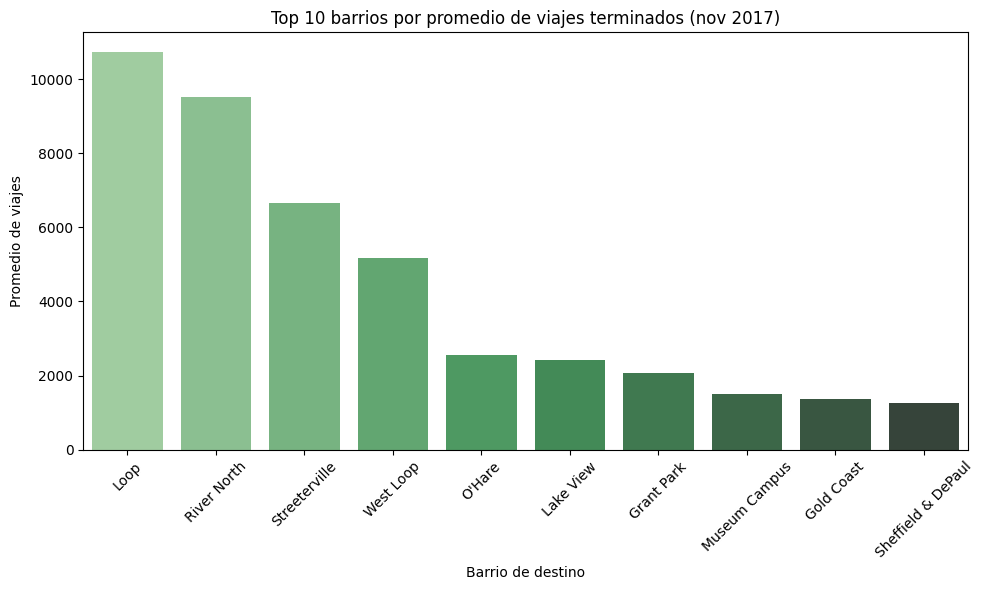

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(data=top10_neighborhoods, x='dropoff_location_name', y='average_trips', palette='Greens_d')
plt.title('Top 10 barrios por promedio de viajes terminados (nov 2017)')
plt.xticks(rotation=45)
plt.ylabel('Promedio de viajes')
plt.xlabel('Barrio de destino')
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">
<b>Celda [7]</b> <a class="tocSkip"></a><br>
Buena visualización. El gráfico es claro, tiene títulos y etiquetas legibles, y emplea una paleta adecuada para destacar los valores. Rotar las etiquetas en el eje X mejora mucho la legibilidad.
</div>


Los barrios como Loop y River North suelen tener altos promedios de finalizaciones.

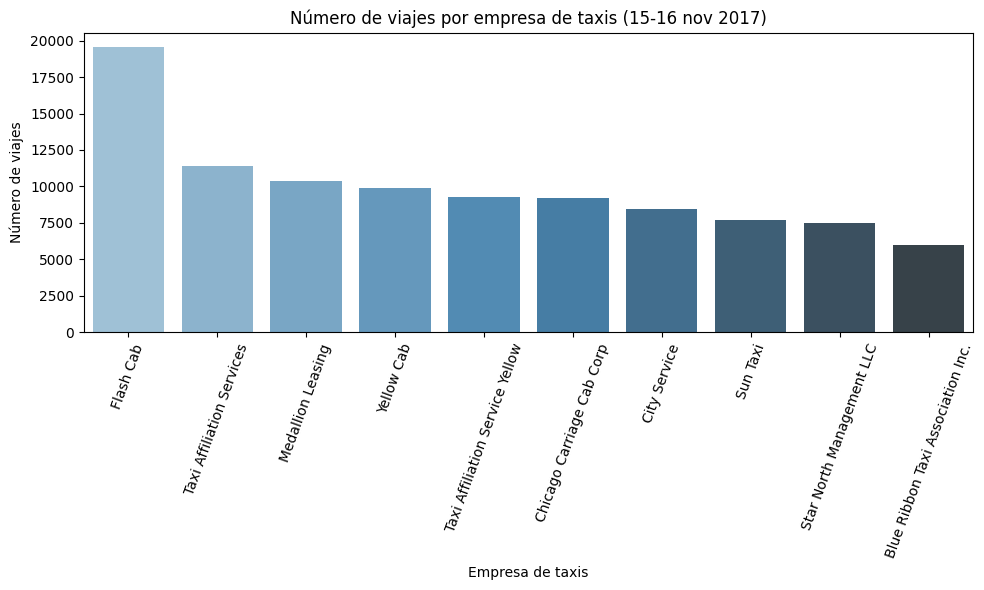

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(data=data_company.head(10), x='company_name', y='trips_amount', palette='Blues_d')
plt.title('Número de viajes por empresa de taxis (15-16 nov 2017)')
plt.xticks(rotation=70)
plt.ylabel('Número de viajes')
plt.xlabel('Empresa de taxis')
plt.tight_layout()
plt.show()

Se observa que ciertas compañías como Flash Cab o Taxi Affiliation Services realizaron más viajes que otras.

In [9]:
# Prueba de hipótesis (Python)
#
# preparo los datos de los viaje del sabado
loop_ohare['start_ts'] = pd.to_datetime(loop_ohare['start_ts'])
loop_ohare['weekday'] = loop_ohare['start_ts'].dt.dayofweek  # sábado = 5
saturdays = loop_ohare[loop_ohare['weekday'] == 5]
saturdays

,start_ts,weather_conditions,duration_seconds,weekday
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,5
1064,2017-11-11 10:00:00,Good,1318.0,5
1065,2017-11-11 13:00:00,Good,2100.0,5
1066,2017-11-11 08:00:00,Good,1380.0,5


<div class="alert alert-block alert-warning">
<b>Celda [9]</b> <a class="tocSkip"></a><br>
Aunque transformas correctamente las fechas y filtras por sábados, no se verifica si los datos están completos o si hay suficientes muestras para cada grupo (“Good” y “Bad”).

</div>


In [10]:
# Divido lso viaje por clima
rainy = saturdays[saturdays['weather_conditions'] == 'Bad']['duration_seconds']
not_rainy = saturdays[saturdays['weather_conditions'] == 'Good']['duration_seconds']
rainy

6       2969.0
30      1980.0
34      2460.0
51      2760.0
52      2460.0
         ...  
1031    2560.0
1032    1908.0
1053    2400.0
1061    2186.0
1067    2834.0
Name: duration_seconds, Length: 180, dtype: float64

In [11]:
not_rainy

0       2410.0
1       1920.0
2       1543.0
3       2512.0
4       1440.0
         ...  
1062    1500.0
1063       0.0
1064    1318.0
1065    2100.0
1066    1380.0
Name: duration_seconds, Length: 888, dtype: float64

In [12]:
# Prueba de hipótesis
alpha = 0.05
levene_test = stats.levene(rainy, not_rainy)
equal_var_rainy_not_rainy= levene_test.pvalue > 0.05
result = stats.ttest_ind(rainy, not_rainy, equal_var=equal_var_rainy_not_rainy)
print("p-valor:", result.pvalue)

if result.pvalue < alpha:
    print("Rechazamos la hipótesis nula: hay diferencia significativa.")
else:
    print("No podemos rechazar la hipótesis nula: no hay diferencia significativa.")

p-valor: 6.517970327099473e-12
Rechazamos la hipótesis nula: hay diferencia significativa.


<div class="alert alert-block alert-success">
<b>Celda [12]</b> <a class="tocSkip"></a><br>
La lógica estadística es correcta: realizas un test de Levene para verificar homogeneidad de varianzas y luego eliges el test t con el parámetro adecuado. 
</div>


Hipotesis:
“La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.”

Existe una diferencia estadísticamente significativa en la duración de los viajes los sábados entre días lluviosos y días sin lluvia.
Esto indica que el clima sí afecta el tiempo que tardan los viajes desde el Loop hasta O'Hare los sábados.

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Buen trabajo, Christian! Has planteado una hipótesis clara y has utilizado métodos estadísticos adecuados para evaluarla. Las visualizaciones son claras y ayudan a comunicar los hallazgos.

¡Sigue adelante, vas por buen camino!
</div>
